# Assignment 7

**Group members** :
- Max Chipani
- Jesus Gamboa
- Karen Salazar
- Paolo Gutierrez
- Luis Camarena

In [49]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import chardet

## Question 1

Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [53]:
# Getting the character format (encoding type)
base = open(r'../../_data/data_dengue_peru.csv', 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'UTF-8-SIG'

In [54]:
# Getting data of people infected with dengue
data = pd.read_csv(r'../../_data/data_dengue_peru.csv', dtype={'Ubigeo': 'str'}, encoding=charenc)
data.sort_values(by=['Año', 'Ubigeo', 'Semana'], inplace=True)
data.reset_index(inplace=True)
data.head()

C:\Users\jesus\AppData\Local\Temp\ipykernel_21476\1834322305.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'../../_data/data_dengue_peru.csv', dtype={'Ubigeo': 'str'}, encoding=charenc)


,index,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,92350,2015,1,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0
1,92352,2015,2,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0
2,92354,2015,3,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0
3,92356,2015,4,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0
4,92358,2015,5,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0


In [55]:
# Getting data types of dataframe
data.dtypes

index               int64
Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo             object
Casos              object
dtype: object

## Question 2

Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [58]:
# Generating the ubigeo variable
data['codgeo'] = data['Ubigeo'].astype(str).str.zfill(6)
data['codgeo'].head()

0    010101
1    010101
2    010101
3    010101
4    010101
Name: codgeo, dtype: object

In [59]:
# Generating the code of departaments
data['cod_dep'] = data['codgeo'].str[:2]
data['cod_dep'].value_counts()

cod_dep
22    27825
20    22949
16    17808
11    13727
14    11872
13    10388
06     9540
10     7632
15     7420
01     6572
25     6095
08     5194
05     4929
24     4823
12     4558
17     3710
02     3339
19     2226
21      742
07      424
18      371
Name: count, dtype: int64

In [60]:
# Generating the cod of provinces
data['cod_pro'] = data['codgeo'].str[:4]
data['cod_pro'].head()

0    0101
1    0101
2    0101
3    0101
4    0101
Name: cod_pro, dtype: object

## Question 3

Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [63]:
data['Casos'] = pd.to_numeric(data['Casos'], errors='coerce').astype('Int64') 
data.head(3)

,index,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,codgeo,cod_dep,cod_pro
0,92350,2015,1,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101
1,92352,2015,2,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101
2,92354,2015,3,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101


In [64]:
# Filter the DataFrame 'data' to include only the rows where the 'Año' column has the value 2021.
data_2021 = data.loc[data.Año==2021]

# Display the first 3 rows of the DataFrame 'data_2021'
data_2021.head(3)

,index,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,codgeo,cod_dep,cod_pro
147287,75264,2021,1,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101
147288,75266,2021,2,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101
147289,75268,2021,3,Dengue,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,010101,0,010101,01,0101


In [65]:
# Group the DataFrame 'data_2021' by the 'Ubigeo' column and compute the sum of the 'Casos' column for each group.
# After aggregation, reset the index to turn the grouped columns back into regular columns, resulting in 'data_2021_anual'.
data_2021_anual = data_2021.groupby('Ubigeo')['Casos'].sum().reset_index()

# Display the DataFrame
data_2021_anual

,Ubigeo,Casos
0,010101,0
1,010201,474
2,010202,25
3,010203,38
4,010204,8
...,...,...
464,250302,26
465,250303,32
466,250304,14
467,250305,2


In [100]:
# Read the shapefile from the specified path into a GeoDataFrame 'shpf1'.
shpf1 = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp' )

# Select only the 'UBIGEO' and 'geometry' columns from the GeoDataFrame 'shpf1'.
shpf1 = shpf1[['UBIGEO', 'geometry']]

# Display the filtered GeoDataFrame 'shpf1'.
shpf1

,UBIGEO,geometry
0,060504,"POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223..."
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,040405,"POLYGON ((-72.3749 -15.2499, -72.37494 -15.250..."
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [67]:
# Access the coordinate reference system (CRS) of the GeoDataFrame shpf1
shpf1.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [68]:
# Perform a left merge between the GeoDataFrame 'shpf1' and the DataFrame 'data_2021_anual',
# merging them based on the 'UBIGEO' column from 'shpf1' and the 'Ubigeo' column from 'data_2021_anual'.
# The 'how="left"' ensures that all rows from 'shpf1' will be included, even if there's no match in 'data_2021_anual'.
data_map1 = pd.merge(shpf1, data_2021_anual, how="left", left_on="UBIGEO", right_on="Ubigeo")
data_map1

,UBIGEO,geometry,Ubigeo,Casos
0,060504,"POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223...",NaN,<NA>
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN,<NA>
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN,<NA>
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN,<NA>
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN,<NA>
...,...,...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN,<NA>
1870,040405,"POLYGON ((-72.3749 -15.2499, -72.37494 -15.250...",NaN,<NA>
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN,<NA>
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN,<NA>


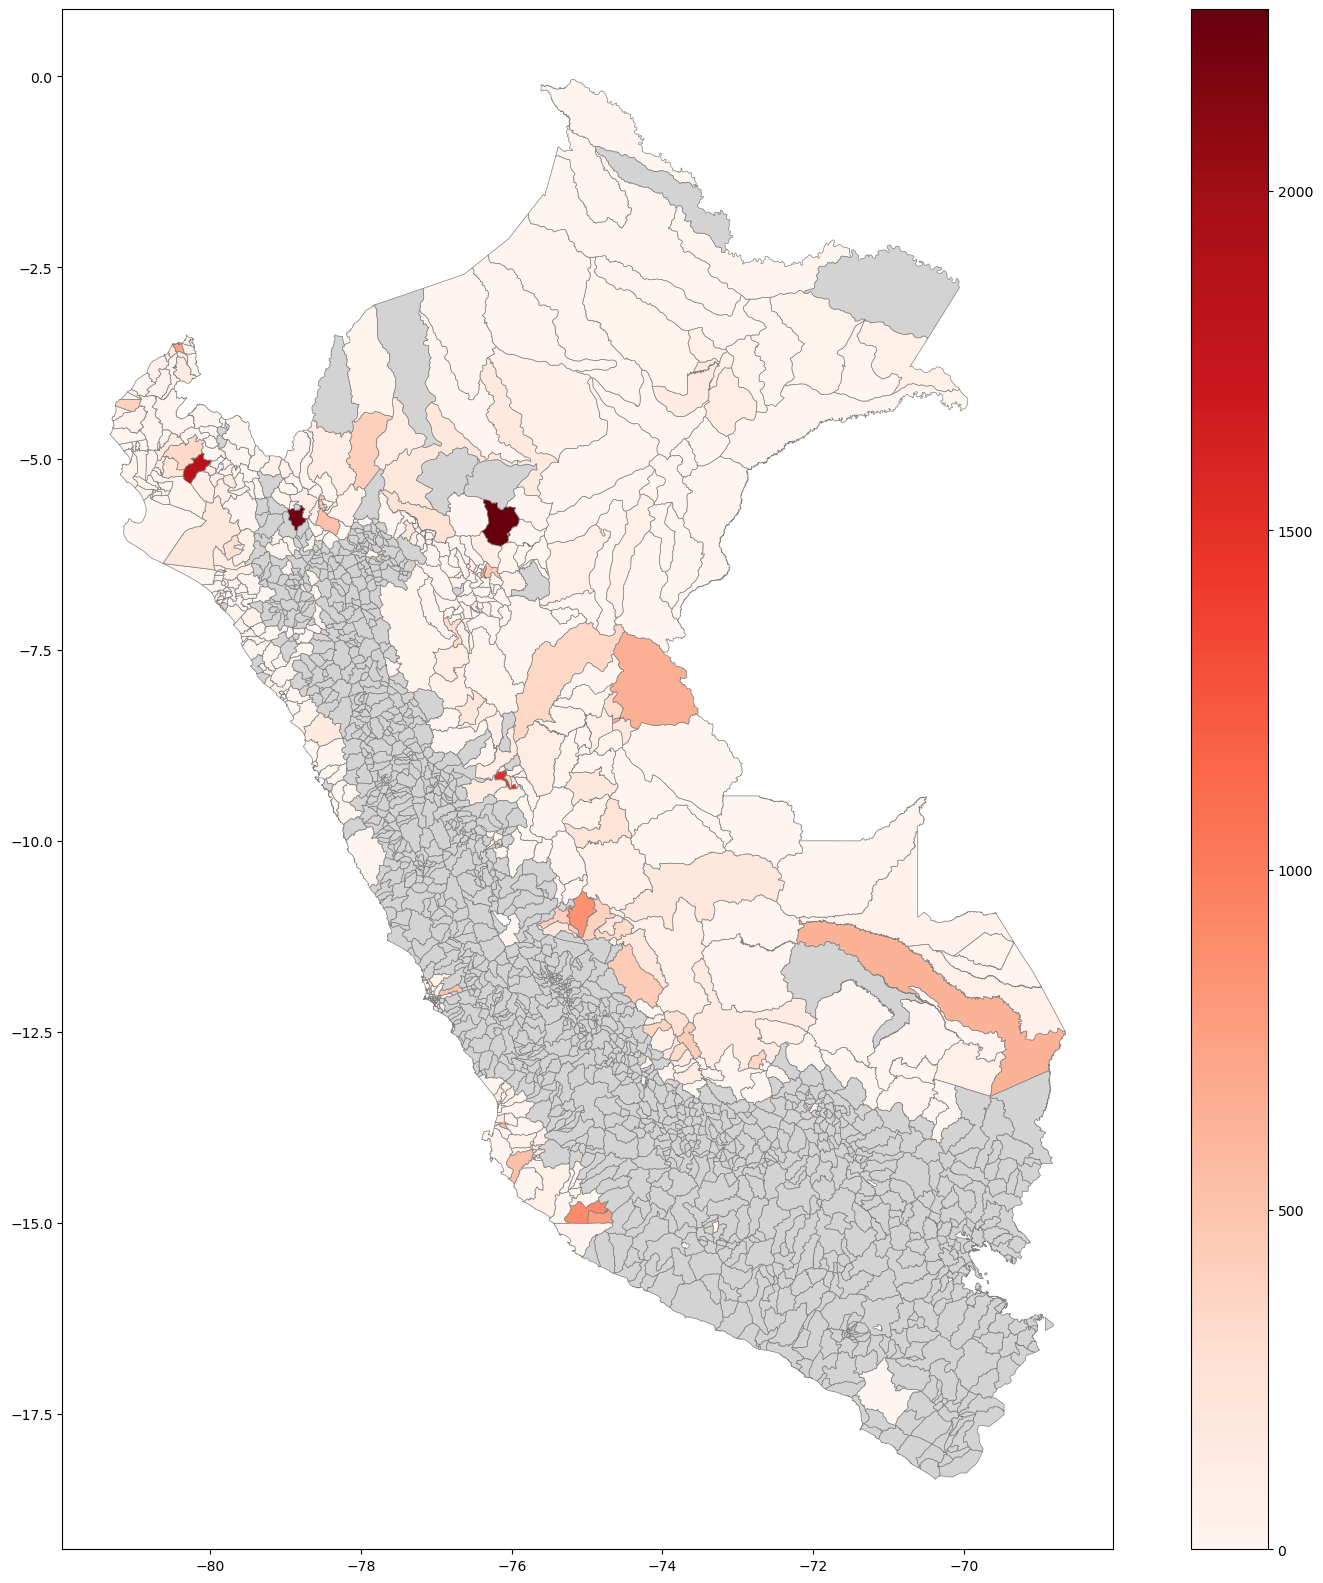

In [98]:
# Create a figure and axes object for the plot, setting the size to 20x20 inches
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the 'Casos' column from the 'datos_map1' GeoDataFrame on the axes, 
# using a 'Reds' colormap, gray borders, and a line width of 0.5. 
# The legend is also enabled.
data_map1.plot(column    ='Casos', 
                cmap      ='Reds', 
                edgecolor ='gray', 
                linewidth =0.5,
                ax        =ax,
                legend    =True)

# Create a mask to identify rows where the 'Casos' column has missing values (NaN)
nan_mask = data_map1['Casos'].isna()

# Plot the areas with missing 'Casos' values (NaN) on the same axes,
# coloring them in light grey with gray borders and no legend
data_map1[nan_mask].plot(ax=ax, color='lightgrey', edgecolor='gray', linewidth=0.5, legend=False)

# Display the plot
plt.show()

## Question 4

Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

## Question 5

Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

## Question 6

Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.